In [21]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Import modules
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, ReLU, GlobalAveragePooling2D, BatchNormalization, Activation, Flatten, Reshape, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
import cv2
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [12]:
(X_train,Y_train),(X_test,Y_test) = cifar100.load_data()
index_train = np.where(Y_train.reshape(1,-1)[0] < 10)
Y_train = Y_train[index_train]
X_train = X_train[index_train]
index_test = np.where(Y_test.reshape(1,-1)[0] < 10)
Y_test = Y_test[index_test]
X_test = X_test[index_test]

In [13]:
X_train = X_train/255.0
X_test = X_test/255.0
X_train= tf.image.resize(X_train,(128,128))
X_test= tf.image.resize(X_test,(128,128))
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(5000, 128, 128, 3) (5000, 1) (1000, 128, 128, 3) (1000, 1)


In [18]:
def create_model(alpha=1, imgsize=224, num_classes=1000, dropout_rate=1e-3):
    model = tf.keras.Sequential() 
    model.add(Conv2D(filters=32*alpha, kernel_size=(3,3), strides=(2,2), padding='same', input_shape=(imgsize,imgsize,3)))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    model.add(Conv2D(filters=64*alpha, kernel_size=(1,1), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(2,2), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    model.add(Conv2D(filters=128*alpha, kernel_size=(1,1), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    model.add(Conv2D(filters=128*alpha, kernel_size=(1,1), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(2,2), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    model.add(Conv2D(filters=256*alpha, kernel_size=(1,1), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    model.add(Conv2D(filters=256*alpha, kernel_size=(1,1), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(2,2), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    model.add(Conv2D(filters=512*alpha, kernel_size=(1,1), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    for i in range(5):
        model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='same'))
        model.add(BatchNormalization())
        model.add(ReLU(6.))

        model.add(Conv2D(filters=512*alpha, kernel_size=(1,1), strides=(1,1), padding='same'))
        model.add(BatchNormalization())
        model.add(ReLU(6.))

    model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(2,2), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    model.add(Conv2D(filters=1024*alpha, kernel_size=(1,1), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    model.add(Conv2D(filters=1024*alpha, kernel_size=(1,1), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU(6.))

    #model.add(AveragePooling2D(pool_size=(7,7), strides=(1,1), data_format='channels_first'))
    model.add(GlobalAveragePooling2D())
    model.add(Reshape((1, 1, int(1024 * alpha))))
    model.add(Dropout(dropout_rate))
    model.add(Conv2D(num_classes, kernel_size=(1,1), padding='same'))
    model.add(Reshape((num_classes,)))
    model.add(Activation('softmax'))
    return model
    
model = create_model(alpha=1, imgsize=128, num_classes=10, dropout_rate=0.)
model.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_108 (Ba  (None, 64, 64, 32)       128       
 tchNormalization)                                               
                                                                 
 re_lu_108 (ReLU)            (None, 64, 64, 32)        0         
                                                                 
 depthwise_conv2d_52 (Depthw  (None, 64, 64, 32)       320       
 iseConv2D)                                                      
                                                                 
 batch_normalization_109 (Ba  (None, 64, 64, 32)       128       
 tchNormalization)                                               
                                                      

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x=X_train, y=Y_train, batch_size=16, epochs=30, validation_data=(X_test, Y_test))

#model.fit(x=X, y=Y, batch_size=16, epochs=10)

Epoch 1/30
313/313 [==============================] - 138s 422ms/step - loss: 2.1063 - accuracy: 0.2768 - val_loss: 2.9618 - val_accuracy: 0.1000
Epoch 2/30
313/313 [==============================] - 118s 376ms/step - loss: 1.7443 - accuracy: 0.3906 - val_loss: 2.3111 - val_accuracy: 0.2260
Epoch 3/30
313/313 [==============================] - 113s 360ms/step - loss: 1.5309 - accuracy: 0.4884 - val_loss: 6.1953 - val_accuracy: 0.1600
Epoch 4/30
313/313 [==============================] - 112s 358ms/step - loss: 1.3031 - accuracy: 0.5584 - val_loss: 2.2354 - val_accuracy: 0.4610
Epoch 5/30
313/313 [==============================] - 117s 374ms/step - loss: 1.1444 - accuracy: 0.6180 - val_loss: 1.7298 - val_accuracy: 0.5160
Epoch 6/30
313/313 [==============================] - 116s 369ms/step - loss: 0.9998 - accuracy: 0.6580 - val_loss: 2.3919 - val_accuracy: 0.4140
Epoch 7/30
313/313 [==============================] - 117s 373ms/step - loss: 0.8635 - accuracy: 0.7134 - val_loss: 2.1203 -

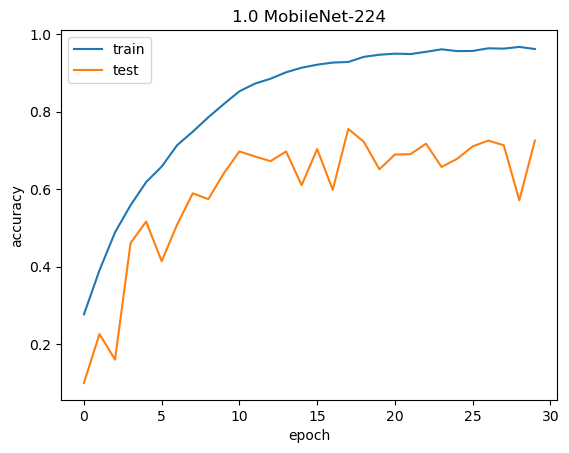

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('1.0 MobileNet-224')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model = create_model(alpha=0.75, imgsize=224, num_classes=10, dropout_rate=0.5)
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 112, 112, 24)      672       
                                                                 
 batch_normalization_54 (Bat  (None, 112, 112, 24)     96        
 chNormalization)                                                
                                                                 
 re_lu_54 (ReLU)             (None, 112, 112, 24)      0         
                                                                 
 depthwise_conv2d_26 (Depthw  (None, 112, 112, 24)     240       
 iseConv2D)                                                      
                                                                 
 batch_normalization_55 (Bat  (None, 112, 112, 24)     96        
 chNormalization)                                                
                                                      

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x=X_train, y=Y_train, batch_size=16, epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
313/313 [==============================] - 230s 710ms/step - loss: 2.2651 - accuracy: 0.2274 - val_loss: 2.6107 - val_accuracy: 0.1000
Epoch 2/30
313/313 [==============================] - 214s 684ms/step - loss: 1.9660 - accuracy: 0.3284 - val_loss: 11.9885 - val_accuracy: 0.1880
Epoch 3/30
313/313 [==============================] - 215s 686ms/step - loss: 1.7951 - accuracy: 0.3806 - val_loss: 1.9430 - val_accuracy: 0.3810
Epoch 4/30
313/313 [==============================] - 216s 690ms/step - loss: 1.6302 - accuracy: 0.4396 - val_loss: 4.5416 - val_accuracy: 0.2810
Epoch 5/30
313/313 [==============================] - 213s 681ms/step - loss: 1.4740 - accuracy: 0.5000 - val_loss: 3.1880 - val_accuracy: 0.3320
Epoch 6/30
313/313 [==============================] - 212s 678ms/step - loss: 1.4052 - accuracy: 0.5168 - val_loss: 1.8690 - val_accuracy: 0.4380
Epoch 7/30
313/313 [==============================] - 215s 688ms/step - loss: 1.2435 - accuracy: 0.5690 - val_loss: 1.7146 

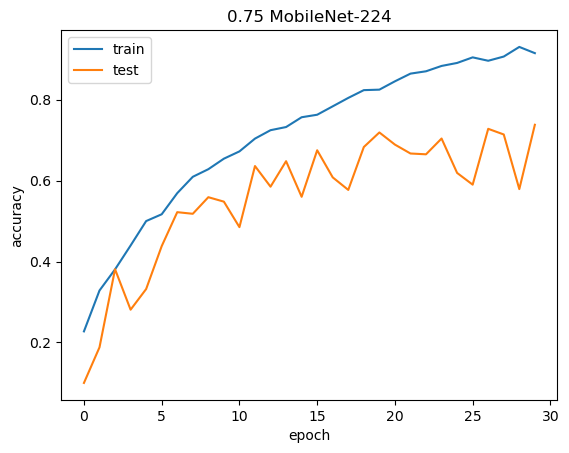

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('0.75 MobileNet-224')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model = create_model(alpha=0.5, imgsize=224, num_classes=10, dropout_rate=0.5)
model.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 112, 112, 16)      448       
                                                                 
 batch_normalization_81 (Bat  (None, 112, 112, 16)     64        
 chNormalization)                                                
                                                                 
 re_lu_81 (ReLU)             (None, 112, 112, 16)      0         
                                                                 
 depthwise_conv2d_39 (Depthw  (None, 112, 112, 16)     160       
 iseConv2D)                                                      
                                                                 
 batch_normalization_82 (Bat  (None, 112, 112, 16)     64        
 chNormalization)                                                
                                                      

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x=X_train, y=Y_train, batch_size=16, epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
313/313 [==============================] - 146s 440ms/step - loss: 2.1907 - accuracy: 0.2216 - val_loss: 2.3621 - val_accuracy: 0.1470
Epoch 2/30
313/313 [==============================] - 137s 439ms/step - loss: 1.9568 - accuracy: 0.3212 - val_loss: 3.1029 - val_accuracy: 0.3240
Epoch 3/30
313/313 [==============================] - 139s 445ms/step - loss: 1.8518 - accuracy: 0.3642 - val_loss: 7.5738 - val_accuracy: 0.2570
Epoch 4/30
313/313 [==============================] - 140s 448ms/step - loss: 1.6789 - accuracy: 0.4272 - val_loss: 5.2533 - val_accuracy: 0.2320
Epoch 5/30
313/313 [==============================] - 141s 450ms/step - loss: 1.5421 - accuracy: 0.4644 - val_loss: 3.0757 - val_accuracy: 0.3080
Epoch 6/30
313/313 [==============================] - 138s 441ms/step - loss: 1.4160 - accuracy: 0.5136 - val_loss: 2.2128 - val_accuracy: 0.4940
Epoch 7/30
313/313 [==============================] - 141s 449ms/step - loss: 1.2946 - accuracy: 0.5566 - val_loss: 3.3555 -

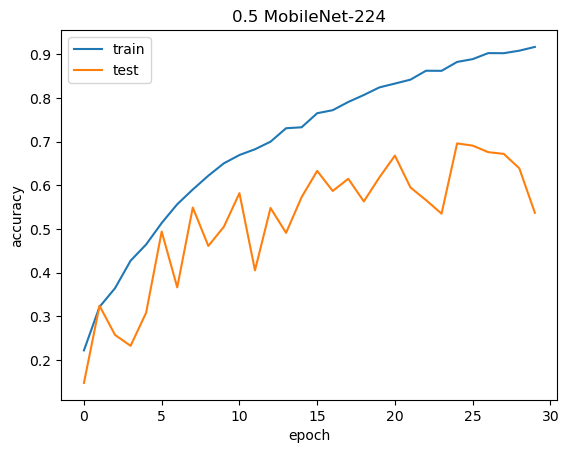

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('0.5 MobileNet-224')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
model = create_model(alpha=0.25, imgsize=224, num_classes=10, dropout_rate=0.5)
model.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 112, 112, 8)       224       
                                                                 
 batch_normalization_108 (Ba  (None, 112, 112, 8)      32        
 tchNormalization)                                               
                                                                 
 re_lu_108 (ReLU)            (None, 112, 112, 8)       0         
                                                                 
 depthwise_conv2d_52 (Depthw  (None, 112, 112, 8)      80        
 iseConv2D)                                                      
                                                                 
 batch_normalization_109 (Ba  (None, 112, 112, 8)      32        
 tchNormalization)                                               
                                                      

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x=X_train, y=Y_train, batch_size=16, epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
313/313 [==============================] - 85s 248ms/step - loss: 2.2411 - accuracy: 0.2066 - val_loss: 5.2672 - val_accuracy: 0.1250
Epoch 2/30
313/313 [==============================] - 76s 241ms/step - loss: 1.9385 - accuracy: 0.3244 - val_loss: 3.0241 - val_accuracy: 0.2640
Epoch 3/30
313/313 [==============================] - 74s 236ms/step - loss: 1.7061 - accuracy: 0.4122 - val_loss: 10.3684 - val_accuracy: 0.1390
Epoch 4/30
313/313 [==============================] - 76s 242ms/step - loss: 1.5835 - accuracy: 0.4562 - val_loss: 4.2836 - val_accuracy: 0.2570
Epoch 5/30
313/313 [==============================] - 75s 240ms/step - loss: 1.4593 - accuracy: 0.4946 - val_loss: 2.2657 - val_accuracy: 0.3830
Epoch 6/30
313/313 [==============================] - 73s 233ms/step - loss: 1.3500 - accuracy: 0.5232 - val_loss: 2.0539 - val_accuracy: 0.4700
Epoch 7/30
313/313 [==============================] - 72s 230ms/step - loss: 1.2773 - accuracy: 0.5632 - val_loss: 3.7393 - val_a

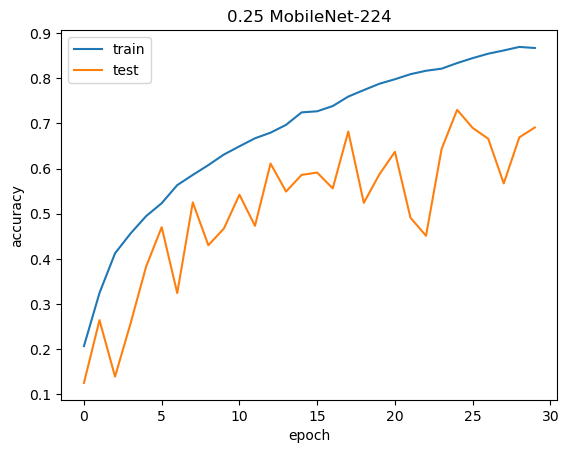

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('0.25 MobileNet-224')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()